# Quadratic Interpolation

The detection of local maxima in a spectrum is limited to the DFT support points without further processing.
The following example shows this for a 25 Hz sinusoid at a sampling rate of 100 Hz. 


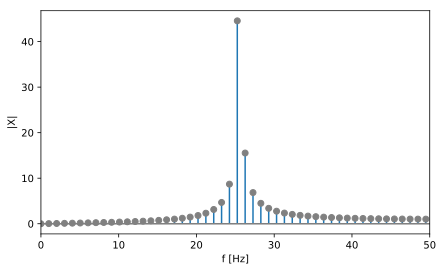

In [2]:
%run header.ipynb
 
fs = 100
t  = np.linspace(0,1,fs)

f0 = 25
x  = np.sin(2*np.pi*fs*f0*t)

 

X = abs(np.fft.fft(x))
#X = np.fft.fftshift(X)
f = np.linspace(0,fs,len(X))

fig, ax = plt.subplots()



markers, = ax.plot(f,X, color="gray",ls="none", marker="o");
baseline = ax.axhline(0, color="gray");


verts = np.c_[f, np.zeros_like(f), f, X].reshape(len(t),2,2)
col   = LineCollection(verts)
ax.add_collection(col)

ax.set_xlabel('f [Hz]')
ax.set_ylabel('|X|')
ax.set_xlim(0,fs/2);
#ax.set_ylim(None, 110);

 


Quadratic or parabolic interpolation can be used to estimate the true peak of the sinusoid. using the detected maximum $a$ and its upper and lower frequency bin.

$p = 0.5  (\alpha-\gamma)/(\alpha-2\beta+\gamma)$

$a^* =  \beta-1/4(\alpha-\gamma)$


[More details on JOS Website](https://ccrma.stanford.edu/~jos/parshl/Peak_Detection_Steps_3.html#sec:peakdet)
